<a href="https://colab.research.google.com/github/nadeem1155/ishika7349/blob/main/CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values:
 Person                                0
Asset Discovery                       0
Vulnerability Scanning                0
Risk Analysis                         0
Vulnerability Prioritization          0
Remediation Planning                  0
Remediation Execution                 0
Reporting                             0
Compliance and Policy Alighment       0
Monitoring and Testing                0
Integration with incident Respones    0
Output                                0
dtype: int64
0:	learn: 0.6856923	total: 47.5ms	remaining: 47.4s
100:	learn: 0.4713799	total: 96.5ms	remaining: 859ms
200:	learn: 0.4086969	total: 152ms	remaining: 605ms
300:	learn: 0.3837781	total: 212ms	remaining: 491ms
400:	learn: 0.3725241	total: 266ms	remaining: 398ms
500:	learn: 0.3660286	total: 319ms	remaining: 318ms
600:	learn: 0.3617733	total: 374ms	remaining: 248ms
700:	learn: 0.3591813	total: 430ms	remaining: 183ms
800:	learn: 0.3572229	total: 484ms	remaining: 120ms
900:	learn: 0.3557594	

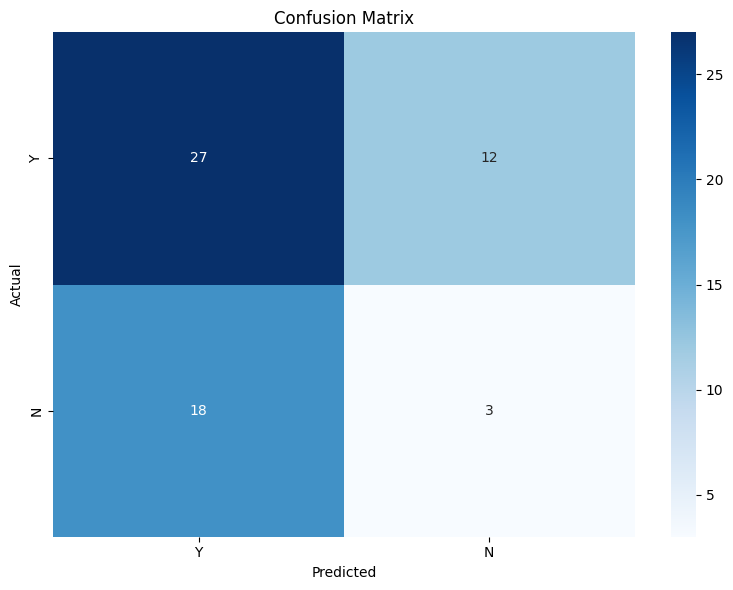

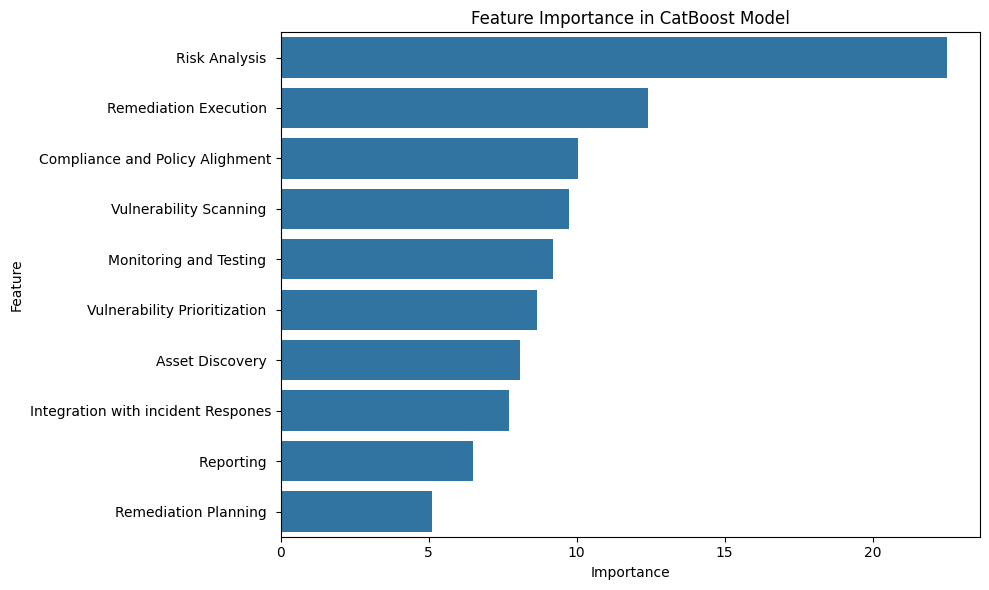

In [22]:
# Step 1: Install required libraries
!pip install catboost
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

# Step 2: Import libraries
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Load the dataset
# Assuming the dataset is uploaded to Colab as 'Data_set_Vulnerability_assessment.csv'
data = pd.read_csv('/content/Data_set_Vulnerability assessment.csv')

# Step 4: Data preprocessing
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Standardize 'Output' column to uppercase (Y/N)
data['Output'] = data['Output'].str.upper()

# Define features and target
X = data.drop(['Person', 'Output'], axis=1)
y = data['Output']

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Initialize CatBoost model
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=42
)

# Step 7: Train the model
catboost_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = catboost_model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Y', 'N'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Y', 'N'], yticklabels=['Y', 'N'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 11: Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': catboost_model.get_feature_importance()
})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Step 12: Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in CatBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()